### Problem 1

Read the code in the lecture note "lecture-06-part2-ResNet". Change the number of layers to 10, 30, 50, 70 for both the ResNet and Feedforward Neural Network (FNN). Compare the performance of ResNet and FNN, and report your observation. (You should be able to see that ResNet outperforms FNN when the number of layers is very large.)

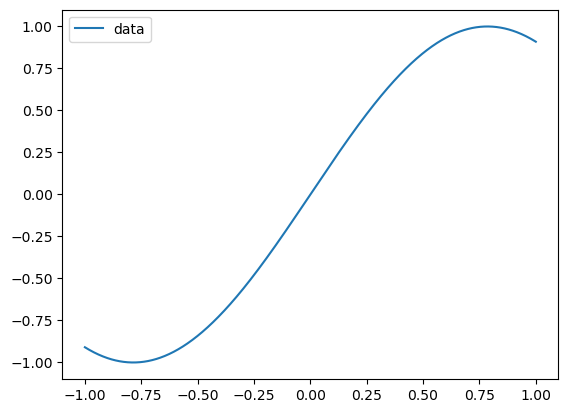

epoch: 0; MSE: 3.85e+04; elapsed time: 0.02 sec
epoch: 1000; MSE: 4.58e-04; elapsed time: 12.29 sec
epoch: 2000; MSE: 3.37e-04; elapsed time: 24.43 sec
epoch: 3000; MSE: 1.72e-04; elapsed time: 37.17 sec
epoch: 4000; MSE: 1.09e-04; elapsed time: 49.70 sec
epoch: 5000; MSE: 1.65e-04; elapsed time: 61.85 sec
epoch: 6000; MSE: 1.29e-04; elapsed time: 74.44 sec
epoch: 7000; MSE: 6.73e-04; elapsed time: 87.29 sec
epoch: 8000; MSE: 1.22e-04; elapsed time: 100.44 sec
epoch: 9000; MSE: 1.63e-05; elapsed time: 114.04 sec


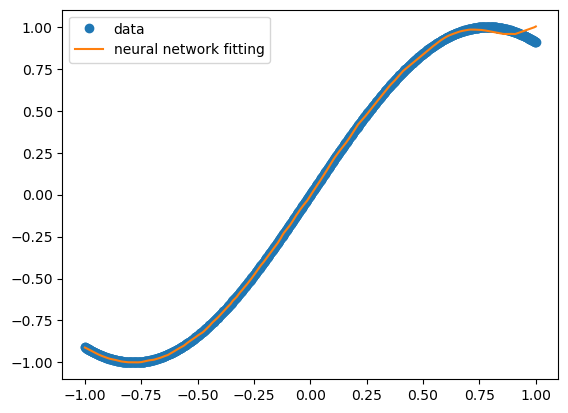

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import time

N = 1000
x_data = torch.linspace(-1, 1, N)
x_data = torch.reshape(x_data, (N, 1))
y_data = torch.sin(2*x_data)

plt.figure()
plt.plot(x_data, y_data, '-', label='data')
plt.legend()
plt.show()

import matplotlib.pyplot as plt
import numpy as np
import torch
import time

# feedforward neural network with arbitrary number of layers
class FNN(torch.nn.Module):
    
    def __init__(self, input_size, output_size, num_layers, hidden_size, activiation):
        super(FNN, self).__init__()
        
        # dimension of the input data: x
        self.input_size = input_size
        
        # dimension of the output data: y
        self.output_size = output_size
        
        # number of layers
        self.num_layers = num_layers
        
        # number of neurons in the hidden layers
        self.hidden_size = hidden_size
        
        # activation functions
        self.activiation = activiation
        
        # first hidden layer
        self.layers = torch.nn.ModuleList([torch.nn.Linear(input_size, hidden_size)])
        # hidden layers inside the neural network
        self.layers.extend([torch.nn.Linear(hidden_size, hidden_size) for i in range(1, self.num_layers-1)])
        # output layer
        self.layers.append(torch.nn.Linear(hidden_size, output_size))
        
        # activation function list: relu, tanh
        self.act_list = {'relu': torch.nn.ReLU(), 'tanh': torch.nn.Tanh()}
        self.act_func = self.act_list[self.activiation]
    
    def forward(self, x):
        
        # input layer
        z = x
        
        for i in range(self.num_layers):
            
            if i < (self.num_layers-1):

                z = z + self.act_func(self.layers[i](z))
            
            else:
                # output layer
                # linear layer: z = W_i * z + b_i
                z = self.layers[i](z)
                
        return z
    
fcn = FNN(input_size=1, output_size=1, num_layers=700, hidden_size=32, activiation='relu')

criterion = torch.nn.MSELoss()

optimizer = torch.optim.Adam(fcn.parameters(), lr=0.001)

total_epoch = 10000

# record time
time_start = time.time()
for epoch in range(total_epoch):

    optimizer.zero_grad()

    loss = criterion(fcn(x_data), y_data)

    loss.backward()
    
    optimizer.step()

    if epoch%1000 == 0:
        time_end = time.time()
        print("epoch: %d; MSE: %.2e; elapsed time: %.2f sec"%(epoch, loss.item(), time_end-time_start))

# plot
plt.figure()
plt.plot(x_data, y_data, 'o', label='data')
plt.plot(x_data, fcn(x_data).detach(), '-', label='neural network fitting')
plt.legend()
plt.show()    

# As we increased the number of layers, the MSE increased, and the computation time increased
# significantly. The fitting was also less correct as the number of layers increased.